In [1]:
import pandas as pd
import requests
import json
import numpy as np

In [9]:
df=pd.read_excel("/Users/joaoalmeida/Downloads/CASOS_OBSCARE_WCR (1).xlsx")


In [11]:
f = open("result-dq.txt", "w")


In [12]:
for idx,line in df.iterrows():
    #print(line.dropna().to_dict())
    tt=line.dropna().to_dict()
    if tt["GS"]=="0,RH_POSITIVO":
        tt["GS"]="O,RH_POSITIVO"
    if tt["GS"]=="0,RH_NEGATIVO":
        tt["GS"]="O,RH_NEGATIVO"
    try:
        x=requests.post("http://localhost:5001/quality_check",json=tt)
   # print(x)
       # print(x.json()["scores"])
        f.write(json.dumps(x.json()["scores"]))
    except:
        f.write(json.dumps({"result":"error"}))

        pass
    f.write("\n")


In [13]:
f.close()


In [2]:
f = open("result-dq.txt", "r")
data=[]
for i in f.readlines():
    line=json.loads(i)
    print(line)
    try:
        #if line["final_score"]:
        data.append(line["final_score"])
    except:
        data.append(np.nan)

{'final_score': 0.06, 'missing_score': 0.16759999999999992, 'correctness_score': 0.06467119674948446, 'iqr_score': 0.14285714285714285, 'expectations_score': 0.0, 'lof_outlier': 0, 'elliptic_outlier': 0}
{'final_score': 0.2, 'missing_score': 0.11064516129032251, 'correctness_score': 0.06216931216931217, 'iqr_score': 0.0, 'expectations_score': 0.0, 'lof_outlier': 0, 'elliptic_outlier': 1}
{'final_score': 0.04, 'missing_score': 0.13892857142857135, 'correctness_score': 0.11991320787962698, 'iqr_score': 0.0, 'expectations_score': 0.0, 'lof_outlier': 0, 'elliptic_outlier': 0}
{'final_score': 0.16, 'missing_score': 0.24333333333333307, 'correctness_score': 0.15402671664176323, 'iqr_score': 0.5714285714285714, 'expectations_score': 0.0, 'lof_outlier': 0, 'elliptic_outlier': 0}
{'final_score': 0.07, 'missing_score': 0.09470588235294113, 'correctness_score': 0.20752833960662734, 'iqr_score': 0.14285714285714285, 'expectations_score': 0.0, 'lof_outlier': 0, 'elliptic_outlier': 0}
{'final_score'

In [3]:
data

[0.06,
 0.2,
 0.04,
 0.16,
 0.07,
 0.19,
 nan,
 0.1,
 0.2,
 0.08,
 0.05,
 0.18,
 0.05,
 0.04,
 0.09,
 0.22,
 0.04,
 0.06,
 0.22,
 0.06,
 0.09,
 0.2,
 0.07,
 0.06,
 0.21,
 0.23,
 0.09,
 0.22,
 0.1,
 0.1,
 0.07,
 0.05,
 0.05,
 0.1,
 0.32,
 0.06,
 0.09,
 0.05,
 0.22,
 0.22,
 0.04,
 0.06,
 0.21,
 0.2,
 0.2,
 0.1,
 0.04,
 0.08,
 0.2,
 0.08,
 0.06,
 nan,
 0.05,
 0.06,
 0.27,
 0.07,
 0.21,
 0.09,
 0.08,
 0.2,
 0.14,
 0.23,
 0.16,
 0.06,
 0.06,
 0.19,
 nan,
 0.26,
 0.04,
 0.05,
 0.21,
 0.04,
 0.1,
 0.07,
 0.24,
 0.05,
 0.22,
 0.07,
 nan,
 0.06,
 0.11,
 0.13,
 0.07,
 0.03,
 0.1,
 0.05,
 0.06,
 0.07,
 0.28,
 0.05,
 0.12,
 0.05,
 0.07,
 0.06,
 0.06,
 0.06,
 0.06,
 0.22,
 0.06,
 0.09,
 0.13,
 0.08,
 0.16,
 0.04,
 0.12,
 0.19,
 0.15,
 0.22,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.13,
 0.06,
 0.2,
 0.04,
 0.05,
 0.05,
 0.13,
 0.09,
 0.15,
 0.06,
 0.1,
 0.28,
 0.04,
 0.07,
 0.03,
 0.05,
 0.1,
 0.19,
 0.05,
 0.1,
 0.07,
 nan,
 0.1,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 0

In [10]:
len(data)

3231

In [11]:
len(df)

3231

In [12]:
result_df=pd.DataFrame(data=data)

In [13]:
result_df.to_csv("result-dq.csv")

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

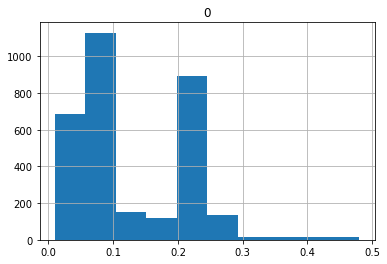

In [14]:
result_df.hist()

In [15]:
import seaborn as sns

<AxesSubplot:xlabel='0'>

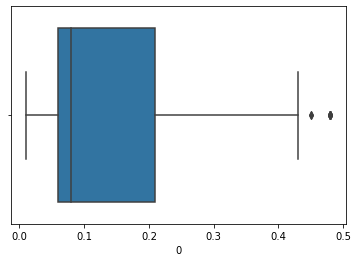

In [16]:
sns.boxplot(x=result_df[0])


/opt/homebrew/Caskroom/miniforge/base/envs/py3/lib/python3.9/site-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


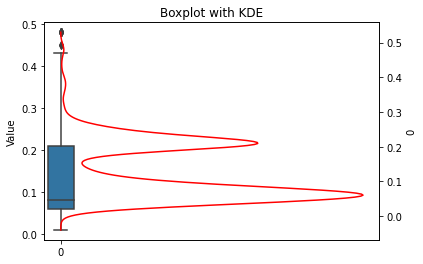

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Generate random data for the boxplot
#np.random.seed(1)
#data = np.random.randn(100)

# Create a figure and axis
fig, ax = plt.subplots()

# Create a boxplot with KDE plots on the sides
sns.boxplot(data=result_df[0], ax=ax)
sns.kdeplot(result_df[0], color='r', ax=ax.twinx(), vertical=True)

# Set labels and title
ax.set_ylabel('Value')
ax.set_title('Boxplot with KDE')

# Show the plot
plt.show()

In [21]:
result_df.columns=["Score"]

/opt/homebrew/Caskroom/miniforge/base/envs/py3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


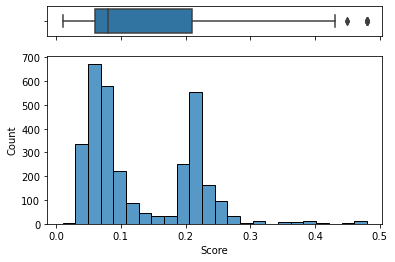

In [26]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(result_df["Score"], ax=ax_box)
sns.histplot(data=result_df["Score"], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.savefig("Scoring.png")
plt.show()


In [31]:
quartiles=result_df["Score"].quantile([0.25, 0.75])

In [32]:
iqr = quartiles[0.75] - quartiles[0.25]
print(iqr)

0.15
